In [28]:
import torch
import matplotlib.pyplot as plt

In [29]:
words = open("names.txt", "r").read().split("\n")

In [30]:
START = "."

In [31]:
import string
itol = {i +1 : c for i, c in  enumerate(string.ascii_lowercase)}
itol[0] = START
ltoi = {s : l  for l, s in itol.items()}
ltoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [32]:
X = []
Y = []
for _ in range(1):
    Xtrain = []
    Ytrain = []
    for word in words[:5]:
        ix = [ltoi[START]] * 3
        word = list(word) + [START]
        for ch in word:
            X.append(ix)
            i = ltoi[ch]
            Y.append(i)
            ix = ix[1:] + [i]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [33]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [34]:
EMDIM = 10
HSIZE = 200

In [35]:
g = torch.Generator().manual_seed(2147483647)
C = torch.rand((27, EMDIM), generator=g)
W1 = torch.rand((EMDIM*3, HSIZE), generator=g)
B1 = torch.rand(HSIZE, generator=g)
W2 = torch.rand((HSIZE, 27), generator=g)
B2 = torch.rand(27, generator=g)

In [36]:
parameters = [C, W1, B1, W2, B2]

In [37]:
for p in parameters:
    p.requires_grad = True

In [38]:
lossi = []
stepi = []

In [42]:
import torch.nn.functional as F

for i in range(10000):
    emb = C[X]
    # forward
    loss = F.cross_entropy((torch.tanh(emb.view(-1, 30) @ W1 + B1)) @ W2 + B2, Y)
    # backward
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.01 * p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())
print(loss.item())


2.2957963943481445


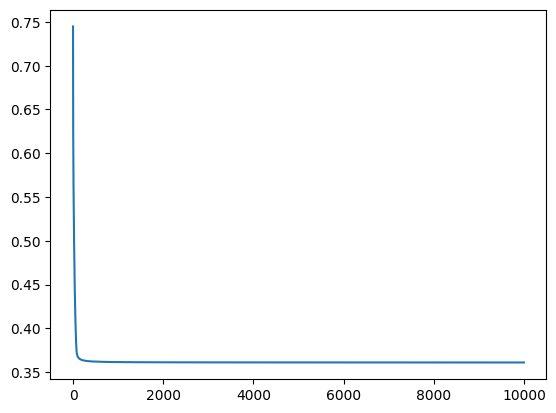

In [40]:
plt.plot(stepi, lossi)